In [48]:
from sklearn.neighbors import KNeighborsClassifier
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import seaborn as sns
from rdkit import rdBase
from rdkit.Chem import RDConfig
import csv
import json
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import rdMolDescriptors
from scipy.io import savemat
from rdkit.Chem import MACCSkeys
from functions import count_category, delete_duplicate, _1to0

from matplotlib import use

from os import walk

from collections import OrderedDict
import schedule
import time 
from functions import delete_duplicate, get_smile, replace_label, handle_files, \
                      assay_type, count_category, certain_assay_file, \
                      check_handled, _1to0, _1to0_col_name_change, \
                      remove_empty_csv, delete_duplicate, delete_duplicate_smiles, \
                      delete_duplicate_smiles_activity,write_to_text, read_dict, read_list,\
                      temp, replace_label_abnormal, assays_file, measure, evaluate_model, evaluate
from convert_FP import smile_to_MACCS
from KNN import KNN_fine_tune, KNN_single, KNN_single_shap, KNN_batch
from convert_FP import smile_to_MACCS
from KNN import KNN_fine_tune


from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#%matplotlib inline
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from functions import measure, evaluate_model, count_category
import shap
from sklearn.neighbors import KNeighborsClassifier
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
#%matplotlib inline
import os
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import seaborn as sns
from rdkit import rdBase
from rdkit.Chem import RDConfig
import csv
import json
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import rdMolDescriptors
from scipy.io import savemat
from rdkit.Chem import MACCSkeys
from functions import count_category, delete_duplicate, _1to0
#%matplotlib inline
import pickle

# KNN

In [49]:
path = '/Users/uranaieiko_1/Desktop/ML_JAKi_20220612/new_data/final_data_20220721/delete_controversy/MACCS/'
files = next(walk(path), (None, None, []))[2]
enzymes = ['JAK1', 'JAK2', 'JAK3', 'TYK2', 'FLT3']
global header
header = ['bit' + str(i) for i in range(167)]
best_neighbors = [1, 1, 1, 3, 177]

In [50]:
for i in range(4): 
    enzyme = enzymes[i]
    best_neighbor = best_neighbors[i]
    file = path + enzyme + '_MACCS.csv'
    data = pd.read_csv(file)
    X = data[header]
    y = data['Activity']
    knn = KNeighborsClassifier(n_neighbors=best_neighbor)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    print('for enzyme', enzyme)
    print('cv scores: ', scores)
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    evaluate(y_test, y_pred)
    filename = path + 'model/knn_' + enzyme + '.pkl'
    pickle.dump(knn, open(filename, 'wb'))

for enzyme JAK1
cv scores:  [0.86440678 0.98033898 0.88067797 0.83242877 0.7265943 ]
TP, FP, TN, FN: 1099 ,  47 ,  303 ,  26
accuracy:  0.9505084745762712
weighted accuracy =  0.9213015873015873
precision =  0.9589877835951134
predictive powers for positive, recall, SE =  0.9768888888888889
predictive powers for negative, SP =  0.8657142857142858
F1-score =  0.9678555702333773
MCC:  0.8610792356887875
Evaluation finished
################################################
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.951  &  0.921  &          0.959  &     0.977  &0.866  &0.968 &0.921 &   0.861 &   0.954
for enzyme JAK2
cv scores:  [0.77324152 0.89714567 0.89173228 0.74753937 0.60531496]
TP, FP, TN, FN: 1279 ,  126 ,  534 ,  94
accuracy:  0.8917855386128873
weighted accuracy =  0.8703138449314706
precision =  0.9103202846975089
predictive powers for positive, recall, SE =  0.9315367807720321
predictive powers for negative, SP =  0.8090909090909

In [4]:
from convert_FP import smile_list_to_MACCS
from load_model import load_model
smi = 'O=C(NCCC(O)=O)C(C=C1)=CC=C1/N=N/C(C=C2C(O)=O)=CC=C2OCCOC3=CC=C(NC4=NC=C(C)C(NC5=CC=CC(S(NC(C)(C)C)(=O)=O)=C5)=N4)C=C3'
load_model(smi, 'JAK1', 'KNN')

drug smile:  O=C(NCCC(O)=O)C(C=C1)=CC=C1/N=N/C(C=C2C(O)=O)=CC=C2OCCOC3=CC=C(NC4=NC=C(C)C(NC5=CC=CC(S(NC(C)(C)C)(=O)=O)=C5)=N4)C=C3
 enzyme     model   prediction
   JAK1     KNN       1.000


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


array([1])

# SVM 'linear', 'poly', 'rbf', 'sigmoid'

In [7]:
path = '/Users/uranaieiko_1/Desktop/ML_JAKi_20220612/new_data/final_data_20220721/delete_controversy/MACCS/'
model_path = path + 'model/'
def SVM_batch(X, y, enzyme, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        if k =='poly':
            model = SVC(kernel=k, degree=8)
        else:
            model = SVC(kernel=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        evaluate(y_test, y_pred)
        
#         print('For SVM model with ', k)
#         print(confusion_matrix(y_test,y_pred))
#         print(classification_report(y_test,y_pred))
        filename = 'SVM_' + k + '_' + enzyme +'.sav'
        
        print(filename)
        modelname = model_path + filename
        pickle.dump(model, open(modelname, 'wb'))
        
for i in range(4): 
    enzyme = enzymes[i]
    file = path + enzyme + '_MACCS.csv'
    data = pd.read_csv(file)
    X = data[header]
    y = data['Activity']
#     models = SVM_batch(X, y)
#     scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    print('for enzyme', enzyme)
#     print('cv scores: ', scores)
    SVM_batch(X, y, enzyme)


for enzyme JAK1
TP, FP, TN, FN: 1083 ,  104 ,  244 ,  44
accuracy:  0.8996610169491526
weighted accuracy =  0.8310538608246898
precision =  0.9123841617523167
predictive powers for positive, recall, SE =  0.9609582963620231
predictive powers for negative, SP =  0.7011494252873564
F1-score =  0.9360414866032845
MCC:  0.7091835109784389
Evaluation finished
################################################
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.900  &  0.831  &          0.912  &     0.961  &0.701  &0.936 &0.831 &   0.709 &   0.907
SVM_linear_JAK1.sav
TP, FP, TN, FN: 1100 ,  45 ,  303 ,  27
accuracy:  0.9511864406779661
weighted accuracy =  0.9233661230609185
precision =  0.9606986899563319
predictive powers for positive, recall, SE =  0.9760425909494232
predictive powers for negative, SP =  0.8706896551724138
F1-score =  0.9683098591549296
MCC:  0.8626566331562734
Evaluation finished
################################################
Accur

TP, FP, TN, FN: 321 ,  25 ,  121 ,  18
accuracy:  0.911340206185567
weighted accuracy =  0.8878348890774639
precision =  0.9277456647398844
predictive powers for positive, recall, SE =  0.9469026548672567
predictive powers for negative, SP =  0.8287671232876712
F1-score =  0.9372262773722627
MCC:  0.7868785343755268
Evaluation finished
################################################
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.911  &  0.888  &          0.928  &     0.947  &0.829  &0.937 &0.888 &   0.787 &   0.916
SVM_rbf_TYK2.sav
TP, FP, TN, FN: 295 ,  77 ,  69 ,  44
accuracy:  0.7505154639175258
weighted accuracy =  0.6714046147007717
precision =  0.793010752688172
predictive powers for positive, recall, SE =  0.8702064896755162
predictive powers for negative, SP =  0.4726027397260274
F1-score =  0.829817158931083
MCC:  0.37197871615080025
Evaluation finished
################################################
Accuracy, weighted accuracy, p

<class 'list'>


In [13]:
from sklearn.ensemble import RandomForestClassifier
from functions import measure, evaluate_model, evaluate

def RF_rough_tune(X, y, test_size=0.2):
    k_list = [item * 10 for item in range(1,50)]
    cv_scores = []
    for k in k_list:
        if k%50==0:
            print('Now trying n_estimator for RF: ', k)
        RF = RandomForestClassifier(n_estimators=k)
        scores = cross_val_score(RF, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    plt.plot(k_list, cv_scores)
    plt.xlabel('Value of n_estimator for RF')
    plt.ylabel('5-fold cross-validated accuracy')
    plt.title('RF relationship with neighbors based on accuracy, rough tune')
    plt.show()

for enzyme JAK1
Now trying n_estimator for RF:  50
Now trying n_estimator for RF:  100
Now trying n_estimator for RF:  150
Now trying n_estimator for RF:  200
Now trying n_estimator for RF:  250
Now trying n_estimator for RF:  300
Now trying n_estimator for RF:  350
Now trying n_estimator for RF:  400
Now trying n_estimator for RF:  450


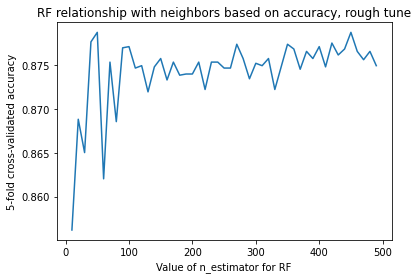

for enzyme JAK2
Now trying n_estimator for RF:  50
Now trying n_estimator for RF:  100
Now trying n_estimator for RF:  150
Now trying n_estimator for RF:  200
Now trying n_estimator for RF:  250
Now trying n_estimator for RF:  300
Now trying n_estimator for RF:  350
Now trying n_estimator for RF:  400
Now trying n_estimator for RF:  450


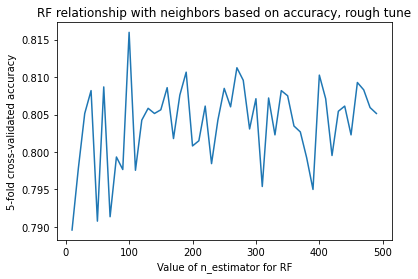

for enzyme JAK3
Now trying n_estimator for RF:  50
Now trying n_estimator for RF:  100
Now trying n_estimator for RF:  150
Now trying n_estimator for RF:  200
Now trying n_estimator for RF:  250
Now trying n_estimator for RF:  300
Now trying n_estimator for RF:  350
Now trying n_estimator for RF:  400
Now trying n_estimator for RF:  450


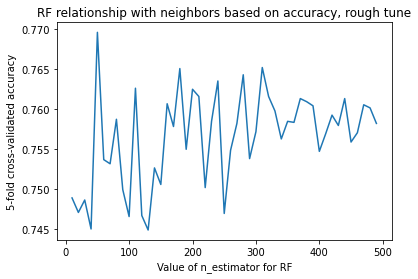

for enzyme TYK2
Now trying n_estimator for RF:  50
Now trying n_estimator for RF:  100
Now trying n_estimator for RF:  150
Now trying n_estimator for RF:  200
Now trying n_estimator for RF:  250
Now trying n_estimator for RF:  300
Now trying n_estimator for RF:  350
Now trying n_estimator for RF:  400
Now trying n_estimator for RF:  450


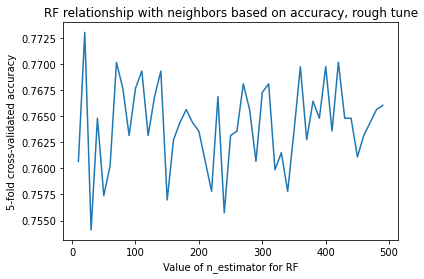

In [14]:
for i in range(4): 
    enzyme = enzymes[i]
    file = path + enzyme + '_MACCS.csv'
    data = pd.read_csv(file)
    X = data[header]
    y = data['Activity']
#     models = SVM_batch(X, y)
#     scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    print('for enzyme', enzyme)
#     print('cv scores: ', scores)
    RF_rough_tune(X, y)

In [27]:
def RF_fine_tune(X, y, low_bound, up_bound, test_size=0.2):
    
    cv_scores = []
    for k in range(low_bound, up_bound):
        if k%5==0:
            print('Now trying n_estimator for RF: ', k)
        RF = RandomForestClassifier(n_estimators=k)
        scores = cross_val_score(RF, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    plt.plot([*range(low_bound, up_bound)], cv_scores)
    plt.xlabel('Value of n_estimator for RF')
    plt.ylabel('5-fold cross-validated accuracy')
    plt.title('RF relationship with neighbors based on accuracy, rough tune')
    plt.show()
    
    print(max(cv_scores))
    max_accuracy = max(cv_scores)
    for i, j in zip([*range(low_bound, up_bound)], cv_scores):
        if j == max_accuracy:
            print('fine tune max_accuracy occurs at RF n_estimator #', i)   
            neighbor_max_accuracy = i
            break
            
    return neighbor_max_accuracy

for enzyme JAK1
Now trying n_estimator for RF:  20
Now trying n_estimator for RF:  25
Now trying n_estimator for RF:  30
Now trying n_estimator for RF:  35
Now trying n_estimator for RF:  40
Now trying n_estimator for RF:  45
Now trying n_estimator for RF:  50
Now trying n_estimator for RF:  55
Now trying n_estimator for RF:  60
Now trying n_estimator for RF:  65


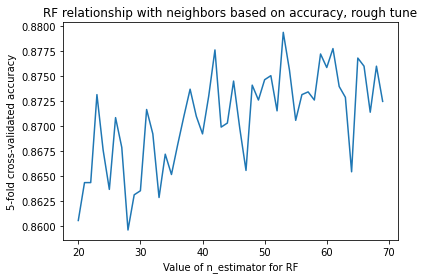

0.8794112641722052
fine tune max_accuracy occurs at RF n_estimator # 53
for enzyme JAK1  best estimator for RF is  53
for enzyme JAK2
Now trying n_estimator for RF:  90
Now trying n_estimator for RF:  95
Now trying n_estimator for RF:  100
Now trying n_estimator for RF:  105


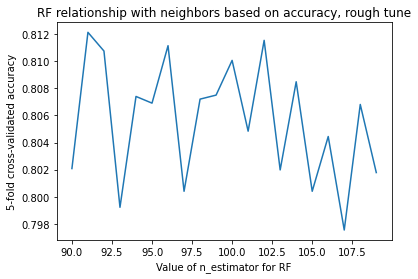

0.8121262941001042
fine tune max_accuracy occurs at RF n_estimator # 91
for enzyme JAK2  best estimator for RF is  91
for enzyme JAK3
Now trying n_estimator for RF:  40
Now trying n_estimator for RF:  45
Now trying n_estimator for RF:  50
Now trying n_estimator for RF:  55
Now trying n_estimator for RF:  60
Now trying n_estimator for RF:  65
Now trying n_estimator for RF:  70
Now trying n_estimator for RF:  75


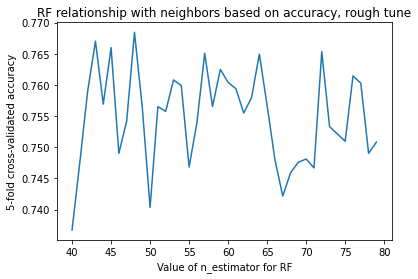

0.7684578365779634
fine tune max_accuracy occurs at RF n_estimator # 48
for enzyme JAK3  best estimator for RF is  48
for enzyme TYK2
Now trying n_estimator for RF:  5
Now trying n_estimator for RF:  10
Now trying n_estimator for RF:  15


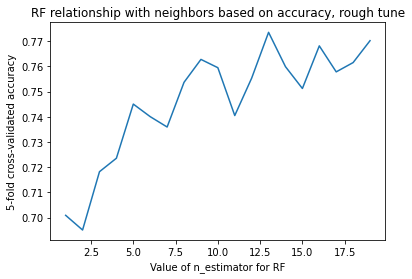

0.7734889665161454
fine tune max_accuracy occurs at RF n_estimator # 13
for enzyme TYK2  best estimator for RF is  13


In [28]:
for i in range(4): 
    enzyme = enzymes[i]
    file = path + enzyme + '_MACCS.csv'
    data = pd.read_csv(file)
    X = data[header]
    y = data['Activity']
#     models = SVM_batch(X, y)
#     scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    print('for enzyme', enzyme)
#     print('cv scores: ', scores)
    if enzyme == 'JAK1':
        low = 20
        up = 70
    elif enzyme == 'JAK2': 
        low = 90
        up = 110
    elif enzyme == 'JAK3':
        low = 40
        up = 80
    elif enzyme == 'TYK2':
        low = 1
        up = 20
    best_estimator = RF_fine_tune(X, y, low, up)
    print('for enzyme', enzyme, ' best estimator for RF is ', best_estimator)



In [8]:
from sklearn.ensemble import RandomForestClassifier
from functions import evaluate, measure
from sklearn import metrics
def RF_single(X, y, n_estimator, enzyme, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    RF = RandomForestClassifier(n_estimators=n_estimator)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    evaluate(y_test, y_pred)
    metrics.plot_roc_curve(RF, X_test, y_test) 
    
    
    filename = 'RF_' + enzyme +'.sav'
        
    print(filename)
    model_path = '/Users/uranaieiko_1/Desktop/ML_JAKi_20220612/new_data/final_data_20220721/delete_controversy/MACCS/model'
    modelname = model_path + filename
    pickle.dump(RF, open(modelname, 'wb'))

TP, FP, TN, FN: 1092 ,  44 ,  303 ,  36
accuracy:  0.9457627118644067
weighted accuracy =  0.9206419768226133
precision =  0.9612676056338029
predictive powers for positive, recall, SE =  0.9680851063829787
predictive powers for negative, SP =  0.8731988472622478
F1-score =  0.9646643109540636
MCC:  0.8481504128962074
Evaluation finished
################################################
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.946  &  0.921  &          0.961  &     0.968  &0.873  &0.965 &0.921 &   0.848 &   0.955
RF_JAK1.sav
TP, FP, TN, FN: 1314 ,  112 ,  532 ,  75
accuracy:  0.9080177078209543
weighted accuracy =  0.8860456380880835
precision =  0.9214586255259467
predictive powers for positive, recall, SE =  0.9460043196544277
predictive powers for negative, SP =  0.8260869565217391
F1-score =  0.9335701598579041
MCC:  0.784889634446941
Evaluation finished
################################################
Accuracy, weighted accuracy, p

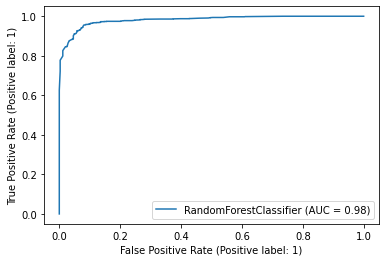

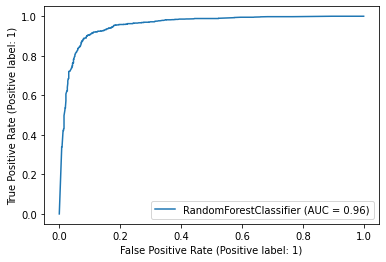

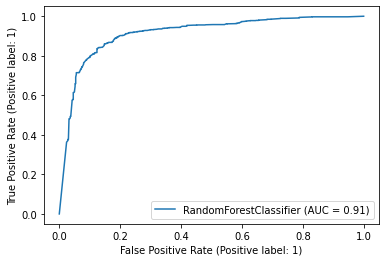

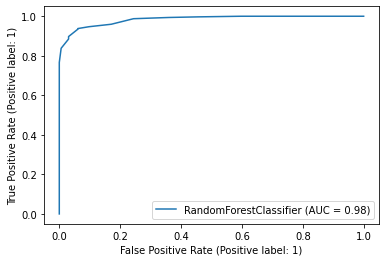

In [9]:
RF_estimator = [53, 91, 48, 13]
enzymes = ['JAK1', 'JAK2', 'JAK3', 'TYK2']
for enzyme, estimator in zip(enzymes, RF_estimator):
    file = path + enzyme + '_MACCS.csv'
    data = pd.read_csv(file)
    X = data[header]
    y = data['Activity']
    RF_single(X, y, estimator, enzyme, test_size=0.2)

In [18]:
import xgboost as xgb
path = '/Users/uranaieiko_1/Desktop/ML_JAKi_20220612/new_data/final_data_20220721/delete_controversy/MACCS/'
model_path = path + 'model/'
def xgboost_batch(X, y, enzyme, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    model = xgb.XGBClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
#     print(accuracy_score(y_test, y_pred))
    filename = 'XGBoost_' + enzyme +'.pkl'
        
    print(filename)
    modelname = model_path + filename
    pickle.dump(model, open(modelname, 'wb'))
    

enzymes = ['JAK1', 'JAK2', 'JAK3', 'TYK2']
for enzyme in enzymes:
    file = path + enzyme + '_MACCS.csv'
    data = pd.read_csv(file)
    X = data[header]
    y = data['Activity']
    xgboost_batch(X, y, enzyme, test_size=0.2)
    


TP, FP, TN, FN: 1080 ,  46 ,  309 ,  40
accuracy:  0.9416949152542373
weighted accuracy =  0.9173541247484909
precision =  0.9591474245115453
predictive powers for positive, recall, SE =  0.9642857142857143
predictive powers for negative, SP =  0.8704225352112676
F1-score =  0.9617097061442564
MCC:  0.8396068725576151
Evaluation finished
################################################
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.942  &  0.917  &          0.959  &     0.964  &0.870  &0.962 &0.917 &   0.840 &   0.952
[[ 309   46]
 [  40 1080]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       355
           1       0.96      0.96      0.96      1120

    accuracy                           0.94      1475
   macro avg       0.92      0.92      0.92      1475
weighted avg       0.94      0.94      0.94      1475

XGBoost_JAK1.pkl
TP, FP, TN, FN: 1278 ,  112 ,  570 ,  73
accuracy:  0.909001

In [19]:
X.shape

(2424, 167)

In [20]:
y.shape

(2424,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
smi = 'CC1=CN=C(N=C1NC2=CC(=CC=C2)S(=O)(=O)NC(C)(C)C)NC3=CC=C(C=C3)OCCN4CCCC4'
MACCS_list = smile_list_to_MACCS([smi])
header = ['bit' + str(i) for i in range(167)]
df = pd.DataFrame(MACCS_list,columns=header)
maccs = df.values

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
type(X_test)

pandas.core.frame.DataFrame

In [46]:
model.predict(MACCS_list.values)

AttributeError: 'list' object has no attribute 'values'